In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('/kaggle/input/rohlik-orders-forecasting-challenge/train.csv')
train_cal=pd.read_csv('/kaggle/input/rohlik-orders-forecasting-challenge/train_calendar.csv')


In [3]:
test=pd.read_csv('/kaggle/input/rohlik-orders-forecasting-challenge/test.csv')
test_cal=pd.read_csv('/kaggle/input/rohlik-orders-forecasting-challenge/test_calendar.csv')

In [4]:
test['date']=pd.to_datetime(test['date'])
train['date']=pd.to_datetime(train['date'])
test_cal['date']=pd.to_datetime(test_cal['date'])
train_cal['date']=pd.to_datetime(train_cal['date'])

In [ ]:
#train、test组合
cols=test.columns
train=train[cols]
train=pd.concat([train,test_cal],axis=0)

In [5]:
train.head()

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.8,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.5,0.0,1704.0,32410.0,Prague_1_2020-12-09


In [ ]:
train_cal[:30]

In [ ]:
train['holiday_name'].unique()

In [ ]:
train_cal[train_cal['date'].between('2020-12-04','2024-03-15')]['holiday_name'].nunique()

In [ ]:
train_cal[train_cal['date'].between('2020-12-04','2024-03-15')].count()

In [ ]:
train_cal['date']=pd.to_datetime(train_cal['date'])

In [ ]:
train_cal.isnull().sum()

In [ ]:
print(train['date'].min(),
train['date'].max())

In [ ]:
train_cal['date']=train_cal['date'].astype(str)

In [ ]:
train_cal['id']=train_cal['warehouse']+'_'+train_cal['date']

In [ ]:
new_train=pd.merge(train,train_cal,on=['date','warehouse'],how='left',suffixes=('', '_cal'),validate='one_to_one')

In [ ]:
new_train['snow'].equals(new_train['snow_cal'])

In [ ]:
train_cal.columns

In [ ]:
train.columns

In [ ]:
test_cols=['warehouse', 'date', 'holiday_name', 'holiday', 'shops_closed',
       'winter_school_holidays', 'school_holidays', 'id']

In [ ]:
train['date']=pd.to_datetime(train['date'])

In [ ]:
train.duplicated(subset=['date','warehouse']).any()

In [ ]:
train['date'].count()

In [ ]:
train['warehouse'].nunique()

In [ ]:
train['date'].max()

In [ ]:
train['date'].min()

In [6]:
train['month']=train['date'].dt.month.astype('category')
train['day'] = train['date'].dt.day.astype('category')
train['weekday']=train['date'].dt.weekday.astype('category')
train['year']=train['date'].dt.year.astype('category')
train['quarter'] = train['date'].dt.quarter.astype('category')
train['week_of_year'] = train['date'].dt.isocalendar().week.astype('category')
train['is_friday'] = (train['weekday'] == 4).astype(int).astype('category')
train['is_q3'] = (train['quarter'] == 3).astype(int).astype('category')

In [ ]:
train[train['date'].dt.isocalendar().week.between(50,53)]

In [ ]:
train['date'].dt.month

<Figure size 1600x1000 with 0 Axes>

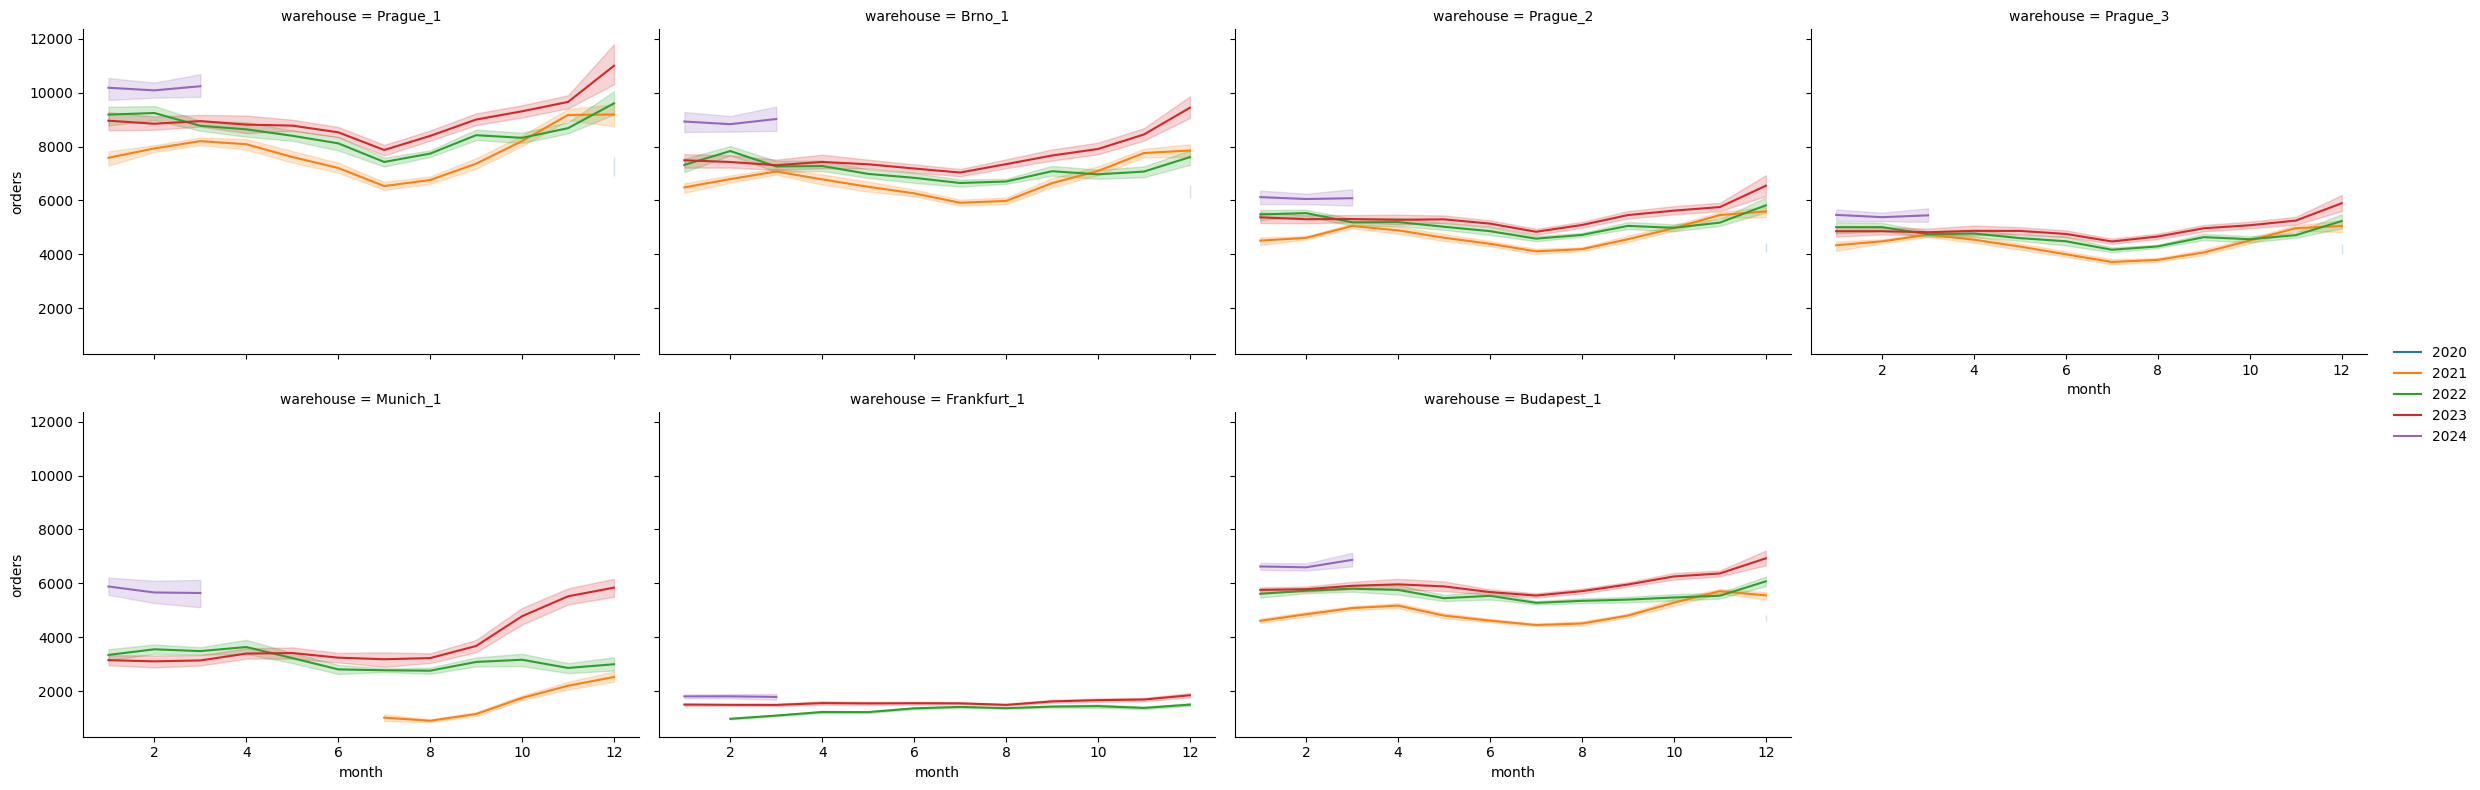

In [7]:
#def date_plot(df,time):
plt.figure(figsize=(16,10))
#filter_train=train[train['date'].dt.month==2]
g = sns.FacetGrid(train, col="warehouse", col_wrap=4, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, "month",'orders',hue="year",).add_legend()
g.set_axis_labels("month",'orders') 

plt.show()

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=train,x='month',y='orders')
plt.show()

In [ ]:
train.isnull().sum()

In [ ]:
test['date'].max()

In [ ]:
test['date'].min()

In [ ]:
test['warehouse'].unique()

In [ ]:
train.columns

In [ ]:
test_cols=['warehouse', 'date', 'holiday_name', 'holiday', 'shops_closed',
       'winter_school_holidays', 'school_holidays', 'id']

In [ ]:
list(set(train.columns)-set(test.columns))

In [ ]:
list(set(train.columns)-set(test.columns))

In [ ]:
train.columns

In [ ]:
test_cal.count()

In [ ]:
test_cal

In [ ]:
test

In [ ]:
train_cal['mov_change']

In [8]:
#train_cal画图系列
train_cal['date']=pd.to_datetime(train_cal['date'])
train_cal['month']=train_cal['date'].dt.month.astype('category')
train_cal['weekday']=train_cal['date'].dt.weekday.astype('category')
train_cal['year']=train_cal['date'].dt.year.astype('category')
train_cal['quarter'] =train_cal['date'].dt.quarter.astype('category')

In [9]:
test_cal['date']=pd.to_datetime(test_cal['date'])
test_cal['month']=test_cal['date'].dt.month.astype('category')
test_cal['weekday']=test_cal['date'].dt.weekday.astype('category')
test_cal['year']=test_cal['date'].dt.year.astype('category')
test_cal['quarter'] =test_cal['date'].dt.quarter.astype('category')

In [10]:
test['date']=pd.to_datetime(test['date'])
test['month']=test['date'].dt.month.astype('category')
test['weekday']=test['date'].dt.weekday.astype('category')
test['year']=test['date'].dt.year.astype('category')
test['quarter'] =test['date'].dt.quarter.astype('category')

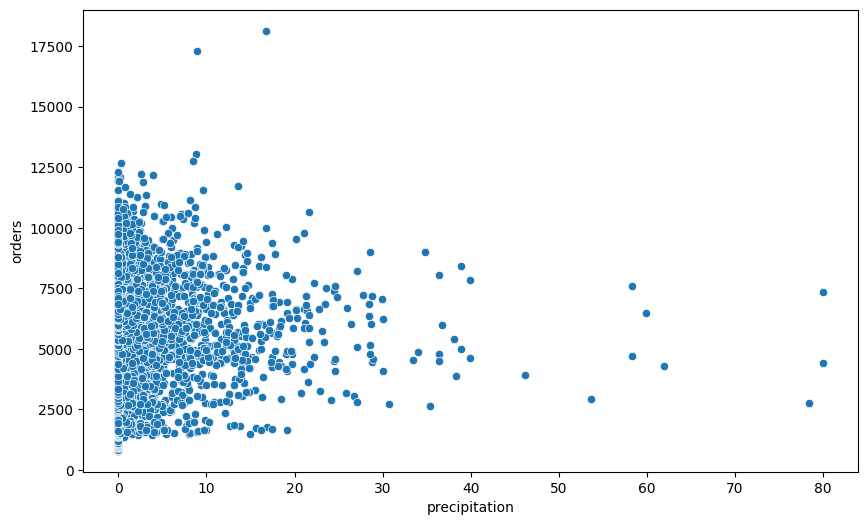

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train,x='precipitation',y='orders')
plt.show()

In [ ]:
train.head()

<Figure size 2000x800 with 0 Axes>

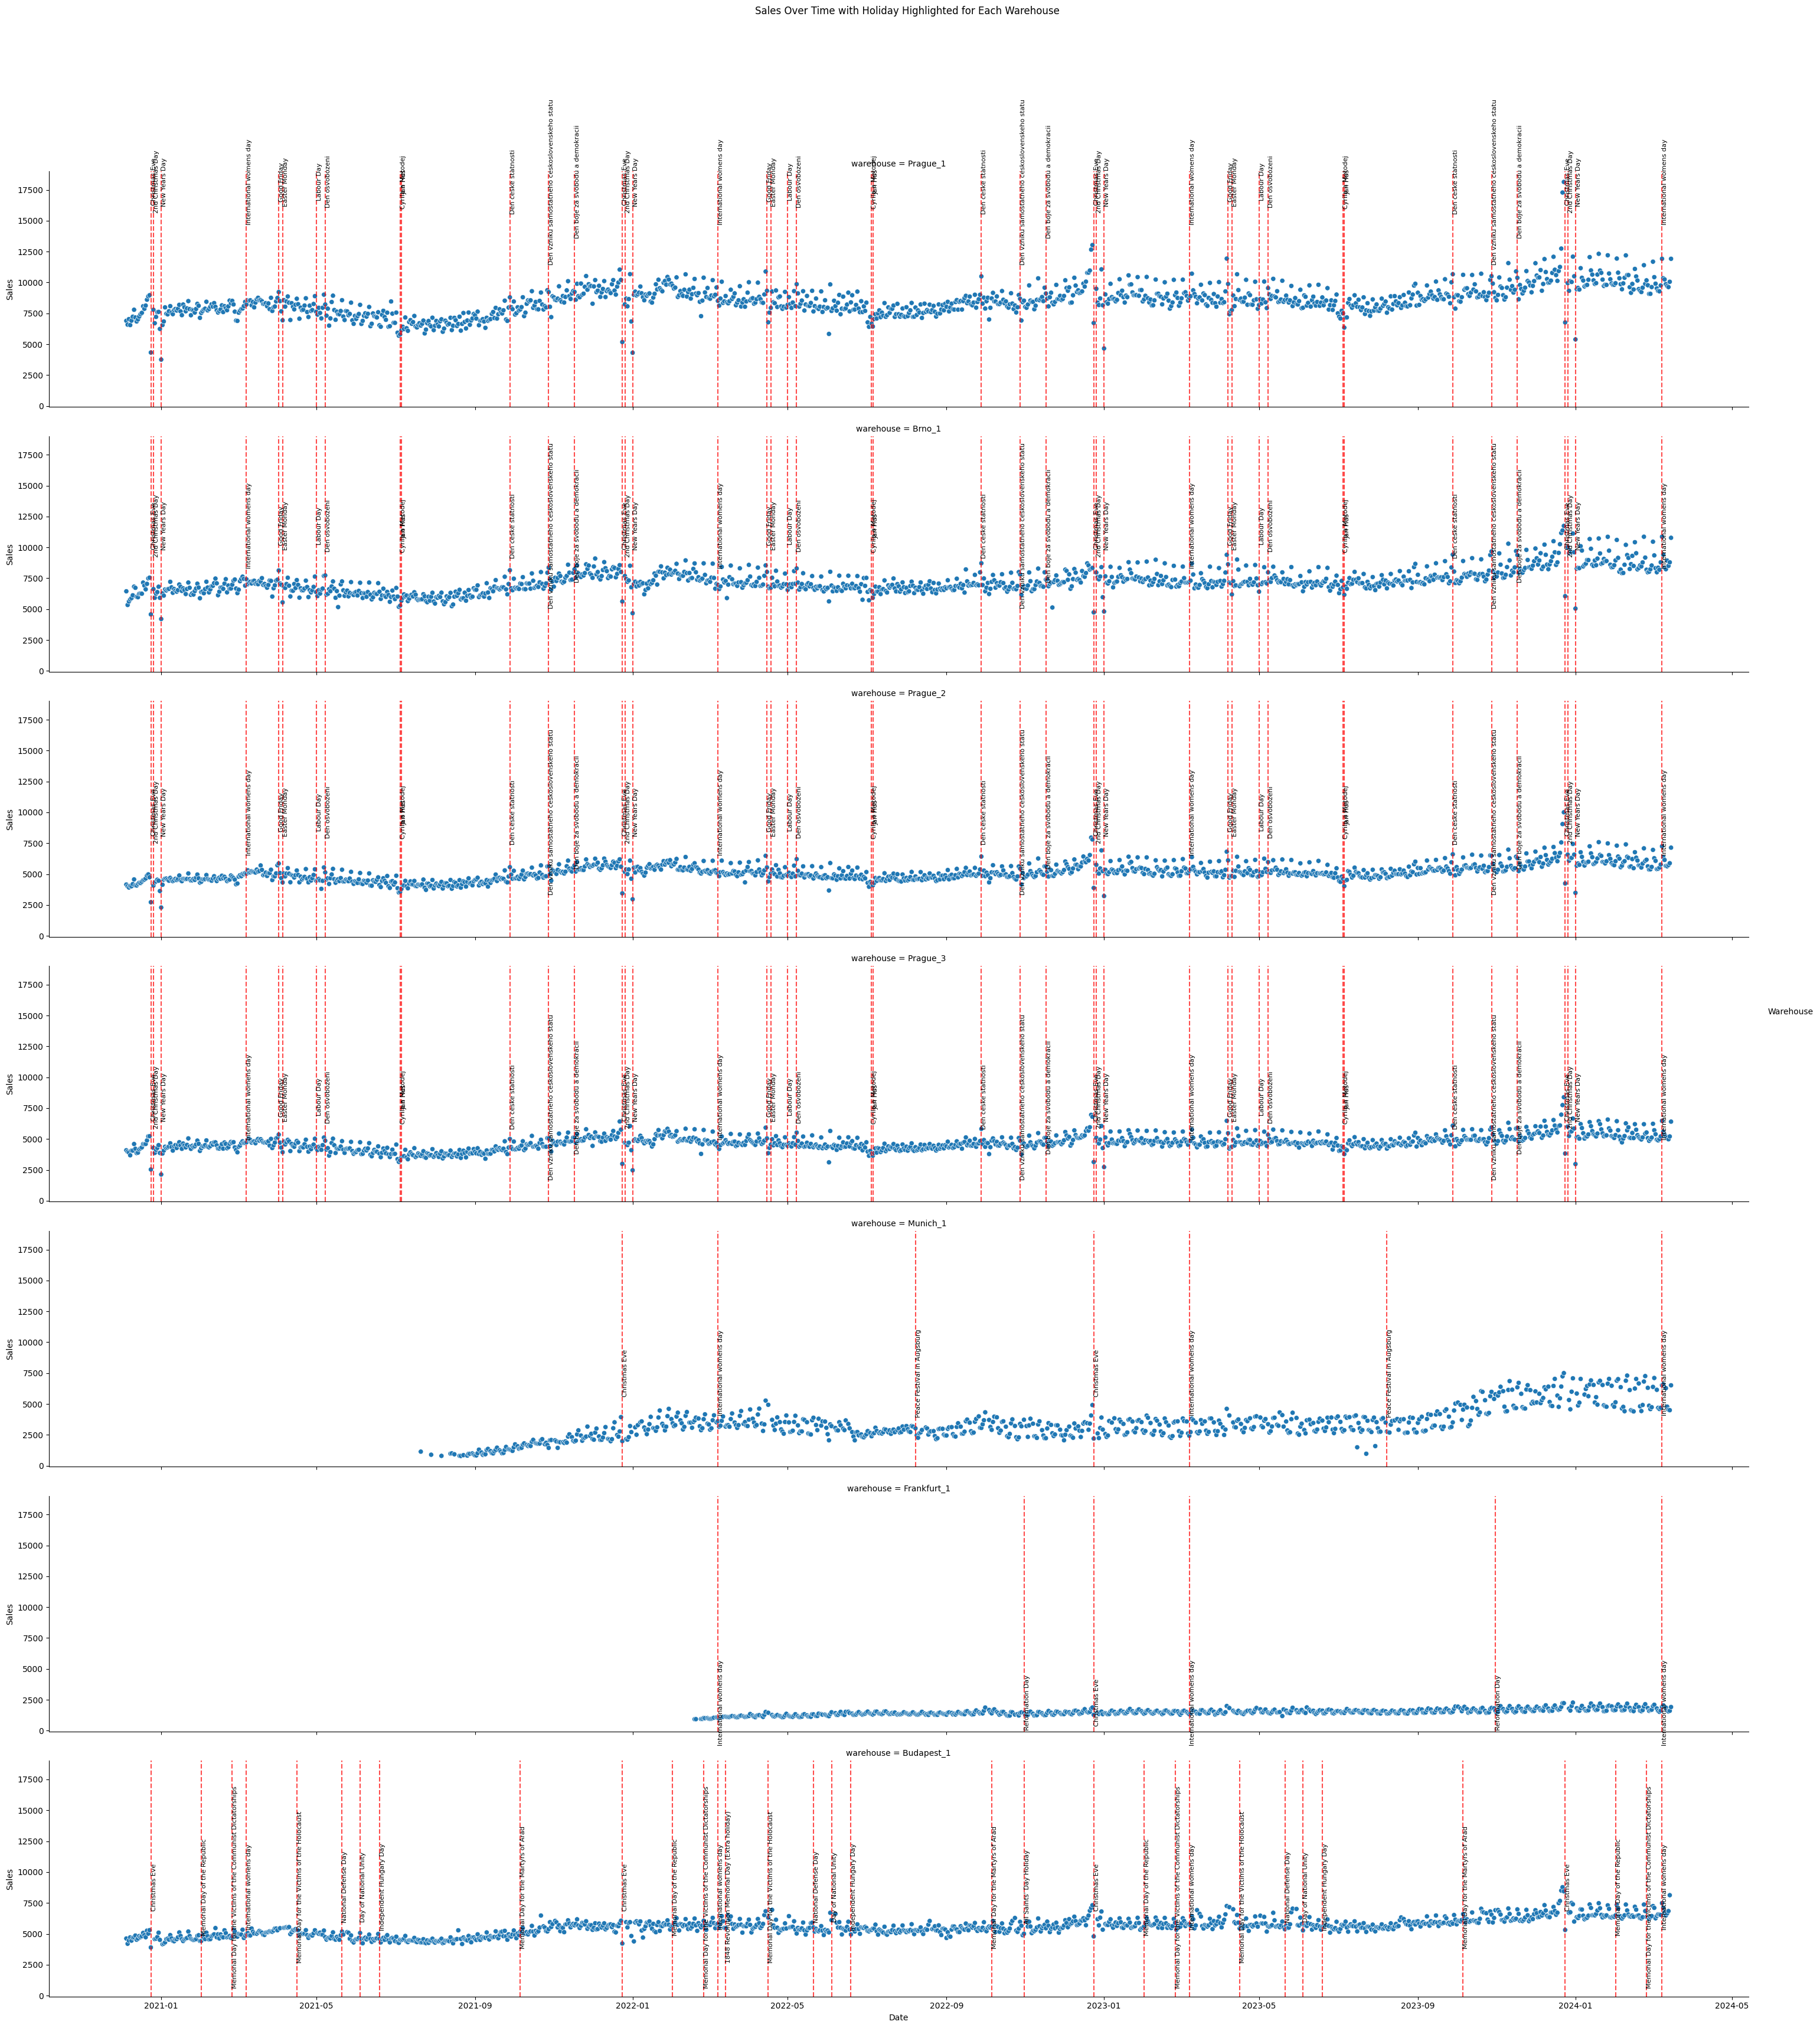

In [19]:
#节日画图
train['holiday_name'].fillna('None', inplace=True)
train['holiday_name'] = train['holiday_name'].astype('category')

# 创建一个新的列，用于标记是否是节假日
train['is_holiday'] = train['holiday_name'] != 'None'

# 确保日期列是datetime类型
train['date'] = pd.to_datetime(train['date'])

plt.figure(figsize=(20,8))

# 创建FacetGrid对象
g = sns.FacetGrid(train, col="warehouse", col_wrap=1, height=5, aspect=6)

# 定义一个函数用于绘制节假日的垂直线
def add_holiday_lines(data, **kwargs):
    ax = plt.gca()
    sns.scatterplot(data=data, x='date', y='orders', hue='warehouse', ax=ax, legend=False)
    for idx, row in data[data['is_holiday']].iterrows():
        ax.axvline(x=row['date'], color='red', linestyle='--', alpha=0.7)
        ax.text(row['date'], data['orders'].max(), row['holiday_name'], rotation=90, verticalalignment='center', fontsize=8)

# 使用map方法绘制每个子图
g.map_dataframe(add_holiday_lines)

# 设置轴标签和标题
g.set_axis_labels("Date", "Sales")
g.add_legend(title='Warehouse')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sales Over Time with Holiday Highlighted for Each Warehouse')

plt.show()

In [ ]:
train_cal[train_cal['mini_shutdown']!=0]

In [ ]:
plt.figure(figsize=(16,10))
#filterd=train_cal[train_cal['warehouse']=='Brno_1']
g = sns.FacetGrid(train, col="holiday_name", col_wrap=4, height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot,'date','orders',hue='year').add_legend()
#g.set_axis_labels("month",) 

plt.show()

In [10]:
train.columns

Index(['warehouse', 'date', 'orders', 'holiday_name', 'holiday', 'shutdown',
       'mini_shutdown', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'blackout', 'mov_change', 'frankfurt_shutdown',
       'precipitation', 'snow', 'user_activity_1', 'user_activity_2', 'id',
       'month', 'day', 'weekday', 'year', 'quarter', 'week_of_year',
       'is_friday', 'is_q3'],
      dtype='object')

In [ ]:
mu = np.mean(train['orders'])
sigma = np.std(train['orders'])
orig_train_num=train['orders'].copy()
train['orders']=(train['orders'] - mu) / sigma
standardized_orders=train['orders'].copy()
diff_initial=standardized_orders.iloc[0]

In [19]:
def standar(df):
    mu = np.mean(df)
    sigma = np.std(df)
    orig_train_num=df.copy()
    df=(df - mu) / sigma

In [20]:
standar(train['orders'])
standar(train['user_activity_2'])
standar(train['user_activity_1'])

<Figure size 10000x1000 with 0 Axes>

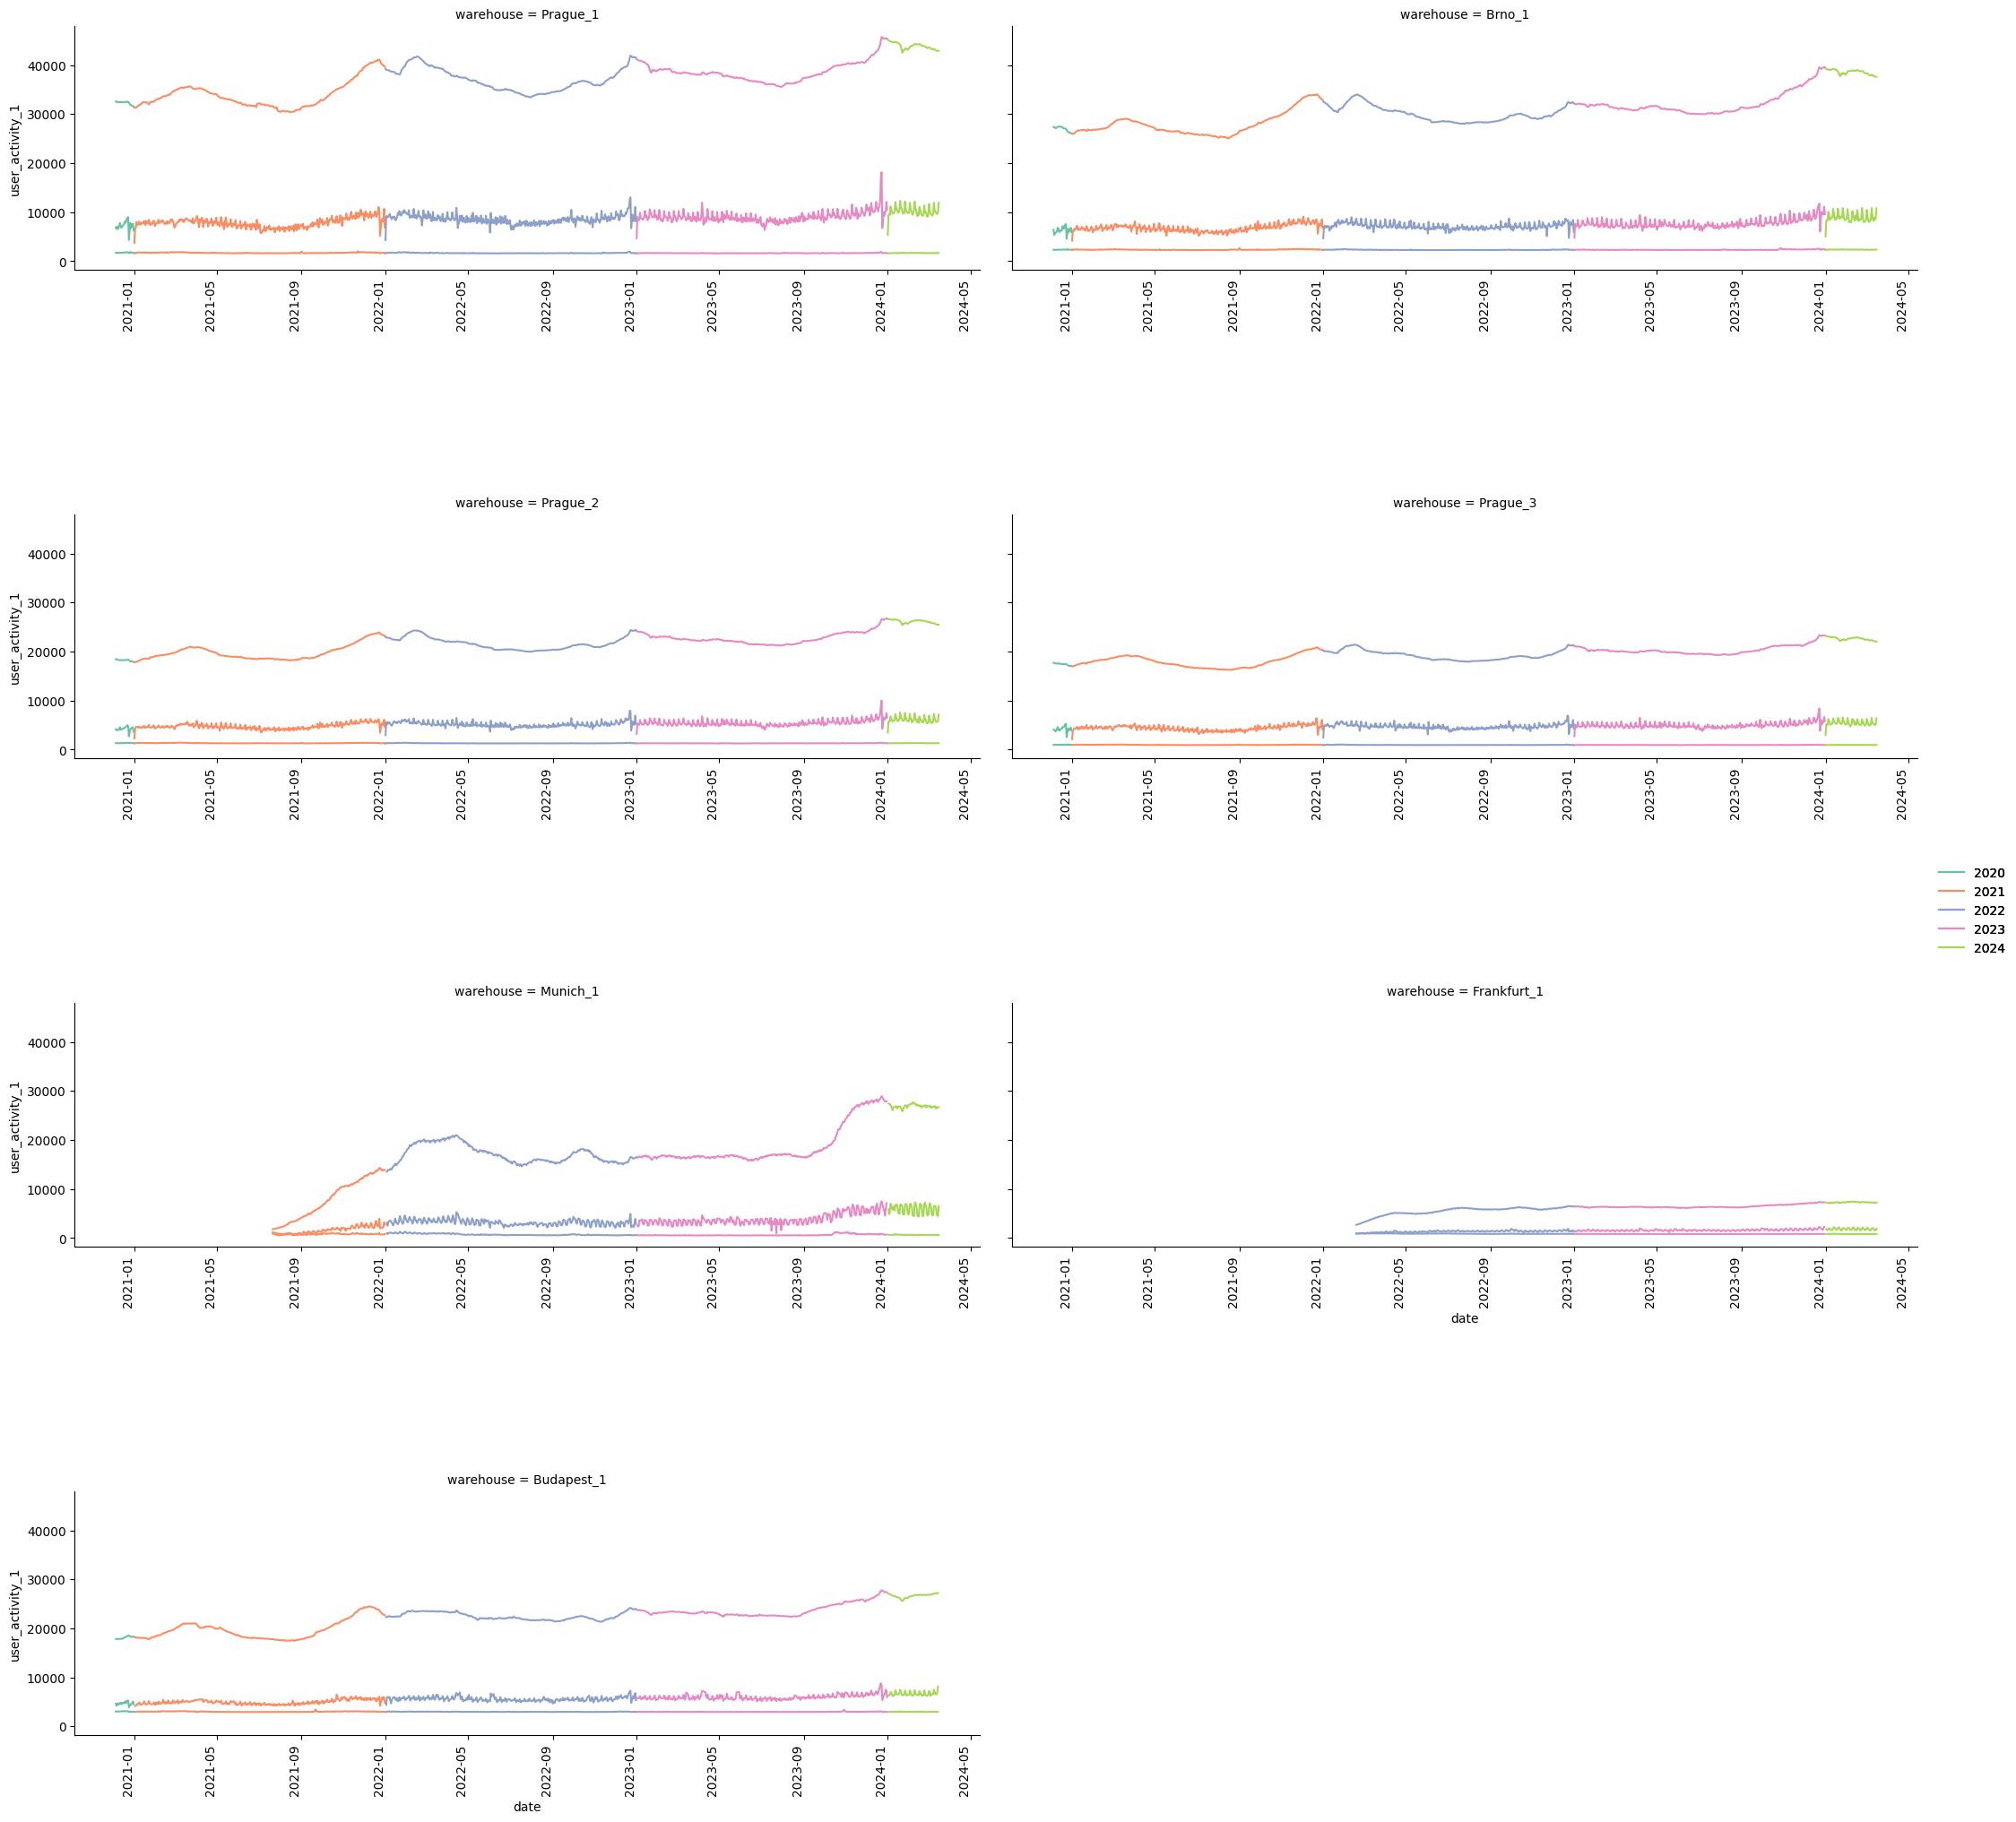

In [20]:
#强制显示坐标标签图
plt.figure(figsize=(100,10))
#filtered=train[train["warehouse"]=='Munich_1']
g = sns.FacetGrid(train, col="warehouse", col_wrap=2, height=5, aspect=2)
g.map_dataframe(sns.lineplot,'date','orders',hue='year',palette='Set2').add_legend()
g.map_dataframe(sns.lineplot,'date','user_activity_2',hue='year',palette='Set2').add_legend()
g.map_dataframe(sns.lineplot,'date','user_activity_1',hue='year',palette='Set2').add_legend()
#g.set_axis_labels("month",) 
for ax in g.axes.flatten():
    ax.tick_params(axis='x', which='both', labelbottom=True)  # 强制显示每个子图的 x 轴标签
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.subplots_adjust(hspace=1) 

plt.show()

In [ ]:
test.columns

In [ ]:
train[train['blackout']!=0]

In [ ]:
test.columns

In [ ]:
train[train['winter_school_holidays']!=train['school_holidays']]

In [ ]:
train[['winter_school_holidays','school_holidays']]

In [ ]:
(weather[weather['warehouse']=='Frankfurt_1']).count()

In [ ]:
#天气相关数据
from datetime import datetime
import meteostat
start=datetime(2020,12,1)
end=datetime(2024,6,19)
cities=[
    {'name':'Frankfurt_1','latitude':50.1269,'longitude':8.6694},
    {'name':'Munich_1','latitude':48.1374,'longitude':11.5755},
    {'name':'Budapest_1','latitude':47.4984,'longitude':19.0404},
    {'name':'Brno_1','latitude':49.1952,'longitude':16.608},
    {'name':'Prague','latitude':50.0167,'longitude':14.45},
    
]
data_list=[]
for city in cities:
    location=meteostat.Point(city['latitude'],city['longitude'])
    data=meteostat.Daily(location,start,end).fetch()
    data['warehouse']=city['name']
    data.reset_index(inplace=True)
    data.rename(columns={'time':'date','prcp':'precipitation'},inplace=True)
    data_list.append(data)
weather=pd.concat(data_list)
weather=weather[['date','warehouse','tavg','precipitation','snow']]

In [ ]:
weather['date']=pd.to_datetime(weather['date'])

In [ ]:
train_cal['snow'].corr(weather['snow'])

In [ ]:
train_cal.dtypes

In [ ]:
test_cal['holiday_name']=test_cal['holiday_name'].notna().astype(int)

In [26]:
train.columns


Index(['warehouse', 'date', 'orders', 'holiday_name', 'holiday', 'shutdown',
       'mini_shutdown', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'blackout', 'mov_change', 'frankfurt_shutdown',
       'precipitation', 'snow', 'user_activity_1', 'user_activity_2', 'id',
       'month', 'day', 'weekday', 'year', 'quarter', 'week_of_year',
       'is_friday', 'is_q3'],
      dtype='object')

In [31]:
train['shift1']=train['user_activity_2'].shift(1)
train['shift2']=train['user_activity_2'].shift(2)
train['shift3']=train['user_activity_2'].shift(3)
train['shift4']=train['user_activity_2'].shift(4)
train['shift5']=train['user_activity_2'].shift(5)
train['shift6']=train['user_activity_2'].shift(6)
train['shift7']=train['user_activity_2'].shift(7)

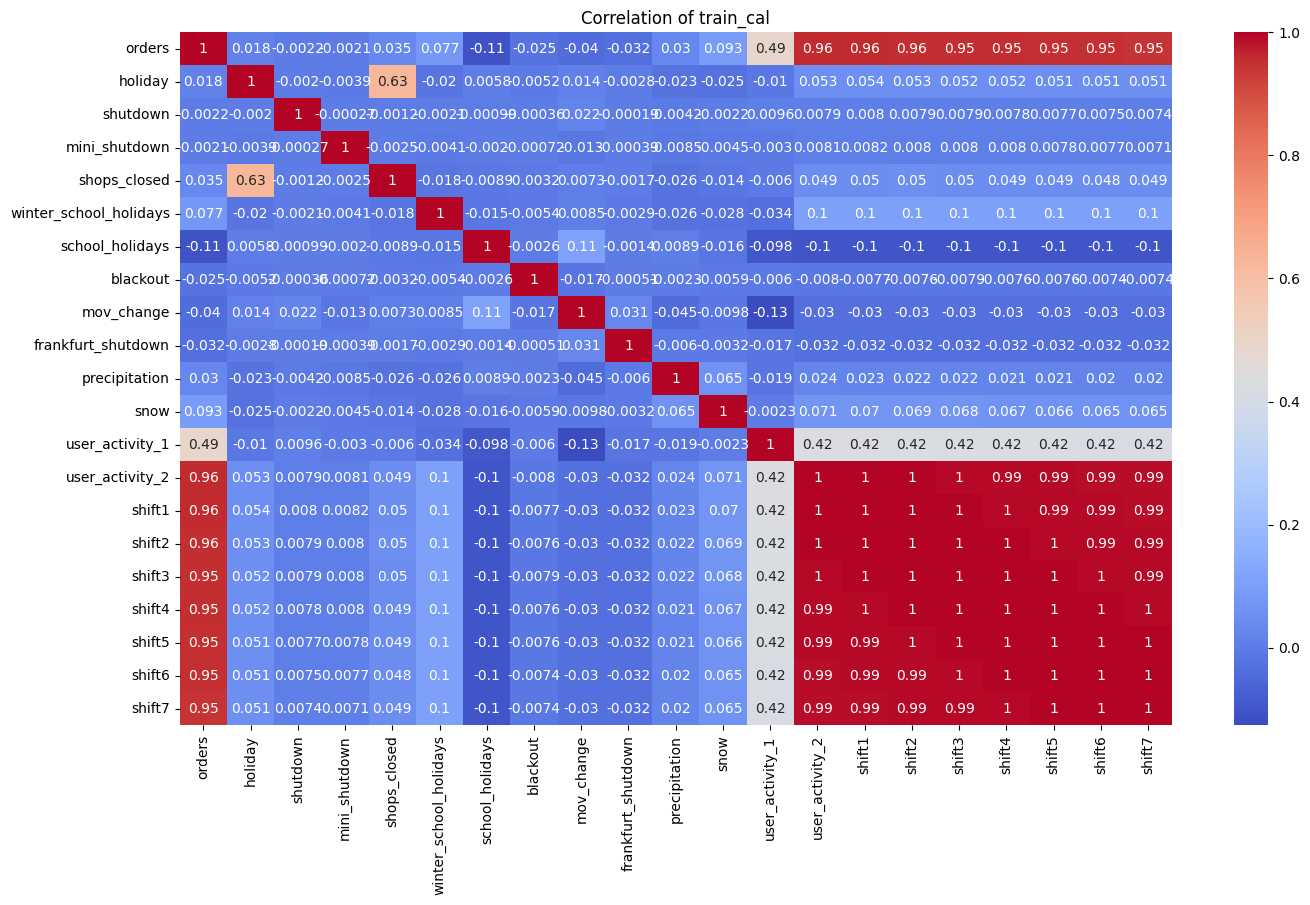

In [32]:
#热力图相关系数
num_cols=train.select_dtypes(include='number').columns
corr_matrix=train[num_cols].corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation of train_cal')
plt.show()

In [ ]:
warehouses=train_cal['warehouse'].unique()

In [ ]:
print(train_cal['date'].min(),
train_cal['date'].max())

In [ ]:
train.dtypes

In [21]:
#每个仓库时间消失的个数，不存在的时间往往表示order为0
warehouses=train['warehouse'].unique()
for warehouse in warehouses:
    df=train[train['warehouse']==warehouse]
    print(f"存在的天数是:{warehouse,df['date'].nunique()}")
for warehouse in warehouses:
    df_date=train[train['warehouse']==warehouse]['date']
    print(f'日期区间是：{warehouse}:{df_date.min()},{df_date.max()}')

存在的天数是:('Prague_1', 1193)
存在的天数是:('Brno_1', 1193)
存在的天数是:('Prague_2', 1193)
存在的天数是:('Prague_3', 1193)
存在的天数是:('Munich_1', 785)
存在的天数是:('Frankfurt_1', 629)
存在的天数是:('Budapest_1', 1154)
日期区间是：Prague_1:2020-12-05 00:00:00,2024-03-15 00:00:00
日期区间是：Brno_1:2020-12-05 00:00:00,2024-03-15 00:00:00
日期区间是：Prague_2:2020-12-05 00:00:00,2024-03-15 00:00:00
日期区间是：Prague_3:2020-12-05 00:00:00,2024-03-15 00:00:00
日期区间是：Munich_1:2021-07-21 00:00:00,2024-03-15 00:00:00
日期区间是：Frankfurt_1:2022-02-18 00:00:00,2024-03-15 00:00:00
日期区间是：Budapest_1:2020-12-05 00:00:00,2024-03-14 00:00:00


In [24]:
full_date_range=pd.date_range(start=test['date'].min(),end=test['date'].max())


In [ ]:
full_date_range

In [ ]:
set(full_date_range)-set(test_cal[test_cal['warehouse']=='Budapest_1']['date'])

In [ ]:
train['warehouse'].unique()

In [ ]:
train_cal.duplicated(subset=['date','warehouse']).any()

In [25]:
missing_dates=full_date_range.difference(train_cal[train_cal['warehouse']=='Budapest_1']['date'])

In [ ]:
missing_dates

In [26]:

all_missing_dates=pd.DataFrame()
for warehouse in warehouses:
    missing_dates=full_date_range.difference(train[train['warehouse']==warehouse]['date'])
    missing_dates=pd.DataFrame(missing_dates,columns=['missing_date'])
    missing_dates['weekday']=missing_dates['missing_date'].dt.day_name()
    missing_dates['month']=missing_dates['missing_date'].dt.month
    missing_dates['year']=missing_dates['missing_date'].dt.year
    missing_dates['warehouse']=warehouse
    all_missing_dates=pd.concat([all_missing_dates,missing_dates],axis=0)


In [ ]:
all_missing_dates

In [ ]:
train_cal[train_cal['id']=='Prague_1_2020-12-25']

In [27]:
all_missing_dates_cal=pd.DataFrame()
for warehouse in warehouses:
    missing_dates=full_date_range.difference(train_cal[train_cal['warehouse']==warehouse]['date'])
    missing_dates=pd.DataFrame(missing_dates,columns=['missing_date'])
    missing_dates['weekday']=missing_dates['missing_date'].dt.day_name()
    missing_dates['month']=missing_dates['missing_date'].dt.month
    missing_dates['year']=missing_dates['missing_date'].dt.year
    missing_dates['warehouse']=warehouse
    all_missing_dates_cal=pd.concat([all_missing_dates_cal,missing_dates],axis=0)

In [28]:
all_missing_dates_cal

,missing_date,weekday,month,year,warehouse
0,2024-03-16,Saturday,3,2024,Prague_1
1,2024-03-17,Sunday,3,2024,Prague_1
2,2024-03-18,Monday,3,2024,Prague_1
3,2024-03-19,Tuesday,3,2024,Prague_1
4,2024-03-20,Wednesday,3,2024,Prague_1
...,...,...,...,...,...
56,2024-05-11,Saturday,5,2024,Budapest_1
57,2024-05-12,Sunday,5,2024,Budapest_1
58,2024-05-13,Monday,5,2024,Budapest_1
59,2024-05-14,Tuesday,5,2024,Budapest_1


In [ ]:
warehouses=train['warehouse'].unique()
for warehouse in warehouses:
    df=train_cal[train_cal['warehouse']==warehouse]
    print(f"存在的天数是:{warehouse,df['date'].nunique()}")
for warehouse in warehouses:
    df_date=train_cal[train_cal['warehouse']==warehouse]['date']
    print(f'日期区间是：{warehouse}:{df_date.min()},{df_date.max()}')

In [ ]:
train_cal[train_cal['warehouse']=='Munich_1']

In [ ]:
#超参数调整部分
import wandb
wandb.login()

In [ ]:

wandb.init(project='orders',
           name='orders3',
           config=params,\
           notes='无新特征加入前的最后版本')

In [ ]:
#optuna超参数调优
from optuna.samplers import RandomSampler
import optuna
def objective(trial):
    params={
        "boosting_type": "gbdt",
        "objective": "regression",
        "max_depth": trial.suggest_int("max_depth", 3,7,step=1),
        "learning_rate": trial.suggest_float("learning_rate", 0.02,0.05,step=0.005),#不同模型有调整
        #"subsample_freq": trial.suggest_int("subsample_freq", 1, 20,step=1),
        #"subsample": trial.suggest_float("subsample", 0.5,1,step=0.005),
        #"num_boost_round": 2000,
        'num_boost_round': trial.suggest_int('num_boost_roung',900,2000),#不同模型有调整
        #"colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 0.9,step=0.005),
       # "colsample_bynode": trial.suggest_float("colsample_bynode", 0.5, 0.9,step=0.005),
        "random_state": 42,
        "reg_alpha": trial.suggest_float("reg_alpha", 1, 20,step=0.005),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 30,step=0.005),
        "extra_trees": True,
        "num_leaves": trial.suggest_int("num_leaves", 10, 50,step=1),
        "verbose": -1,
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 50,step=1),
        "min_child_weight": trial.suggest_float("min_child_weight", 0.01, 0.2,step=0.005),
        'min_split_gain':trial.suggest_float('min_split_gain', 0, 0.5, step=0.01),
        'device':'cpu'
    }
    model=lgb.LGBMRegressor(**params)
    model.fit(X_train,y_train,eval_set=[(X_valid,y_valid)],
              #callbacks=[lgb.log_evaluation(200), lgb.early_stopping(100)],
              )
    y_pred = model.predict(X_test)
    y_pred=pd.Series(y_pred,index=y_test.index)
    score=mape(y_test,y_pred)
    wandb.log({'mape': score})
    return score
#pruner=optuna.pruners.MedianPruner(
    #n_startup_trials=5, n_warmup_steps=500, interval_steps=1)
study=optuna.create_study(direction='minimize',)
study.optimize(objective,n_trials=200,)
print('bset trial:')
best_trial=study.best_trial
print('Value:{}'.format(best_trial.value))
print('Params:')

for key,value in best_trial.params.items():
    print('{}:{}'.format(key,value))